# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import numpy as np
from scipy import stats

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [4]:
df_fillna = df.fillna(0)  #Substituir valores nulos
df_dropna= df.dropna()  #Remover registro com valores nulos
df = df.dropna(subset=['Desconto'])  #Remover registro com Desconto nulo
print('Qtd de valores nulos com Desconto: ', df.isnull().sum().sum())

Qtd de valores nulos com Desconto:  0


In [5]:
df_fillna = df.fillna(0)  #Substituir valores nulos
df_dropna= df.dropna()  #Remover registro com valores nulos
df = df.dropna(subset=['Preco_Normal'])  #Remover registro com Preço Normal nulo
print('Qtd de valores nulos com Preco_Normal: ', df.isnull().sum().sum())

Qtd de valores nulos com Preco_Normal:  0


In [6]:
# Identificar outliers com Z-score
z_score = stats.zscore(df['Preco_Normal'].dropna())
mask = np.abs(z_score) >= 3
outliers_z = df.loc[df['Preco_Normal'].dropna().index[mask]]
print('\n Outilers pelo Z-score: \n', outliers_z)


 Outilers pelo Z-score: 
                                                 title         Marca  \
0                Pack 12 un, Leche extra proteína 1 L    Loncoleche   
1     Pack 12 un, Leche chocolate receta original 1 L       Soprole   
2      Pack 12 un, Leche semidescremada chocolate 1 L       Soprole   
3       Pack 12 un, Leche semidescremada frutilla 1 L       Soprole   
4         Pack 12 un, Leche sin lactosa chocolate 1 L    Loncoleche   
5          Pack 12 un, Leche sin lactosa frutilla 1 L    Loncoleche   
6    Pack 12 un, Leche saborizada light chocolate 1 L    Loncoleche   
7           Pack 12 un, Leche saborizada frutilla 1 L         Colun   
8           Pack 12 un, Leche saborizada vainilla 1 L         Colun   
9             Pack 12 un, Leche saborizada manjar 1 L         Colun   
10           Pack 12 un, Leche saborizada plátano 1 L    Loncoleche   
11         Pack 12 un, Leche saborizada chocolate 1 L    Loncoleche   
12                    Pack 12 un, Leche chocolate 

In [7]:
df_sem_outliers = df.drop(index=outliers_z.index)
print(df_sem_outliers)

                                                 title         Marca  \
32     Leche en Polvo Nido Forticrece Sin lactosa 840g          Nido   
33                        Pack 12 un, Leche entera 1 L  Cuisine & Co   
34                Pack 12 un, Leche semidescremada 1 L  Cuisine & Co   
35                Pack 12 un, leche descremada 1 L c/u  Cuisine & Co   
36                         Churrascos de asiento 720 g  Cuisine & Co   
...                                                ...           ...   
1102                  Helado bresler pote cassata 2,4l       Bresler   
1103   Helado Trisabor chocolate lúcuma y manjar 2,4 L       Bresler   
1104            Shampoo Reconstrucción Completa 400 ml          Dove   
1105         Acondicionador Hidratación Intensa 400 ml          Dove   
1106  Leche en Polvo Nido Forticrece Sin lactosa 1440g          Nido   

      Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto  \
32           10599               0               0         0   
33     

-------------

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [8]:
df.describe()

,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,2070.997290,522.269196,372.257453,68.109304
std,2961.257627,1339.559852,1239.475017,241.158310
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,0.000000,0.000000
75%,2849.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


In [9]:
media_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
mediana_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
print('\n Media por Categoria:\n \n', media_categoria,'\n \n Mediana por Categoria: \n', mediana_categoria)


 Media por Categoria:
 
                     Categoria  Preco_Normal
1          comidas-preparadas   3095.043478
5                     lacteos   2385.219239
2                  congelados   2108.042553
0  belleza-y-cuidado-personal   1783.556485
3                      frutas   1724.473684
6                    verduras   1343.296875
4        instantaneos-y-sopas    765.491228 
 
 Mediana por Categoria: 
                     Categoria  Preco_Normal
1          comidas-preparadas        3290.0
0  belleza-y-cuidado-personal        1569.0
2                  congelados        1519.0
3                      frutas        1195.0
6                    verduras        1180.0
5                     lacteos         989.0
4        instantaneos-y-sopas         439.0


In [10]:
#Seu código aqui para a média
df['Preco_Normal'].mean()

2070.9972899728996

In [11]:
#Seu código aqui para a mediana
df['Preco_Normal'].median()

1269.0

In [13]:
print('\n Catagorias com valor de média abaixo:\n','belleza-y-cuidado-personal, frutas, verduras, instantaneos-y-sopas')
print('\n Catagorias com valor de acima da mediana:\n', 'comidas-preparadas, belleza-y-cuidado-personal, congelados')


 Catagorias com valor de média abaixo:
 belleza-y-cuidado-personal, frutas, verduras, instantaneos-y-sopas

 Catagorias com valor de acima da mediana:
 comidas-preparadas, belleza-y-cuidado-personal, congelados


--------------

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [14]:
#Seu código aqui
desvio_padrao_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
desvio_padrao_categoria

,Categoria,Preco_Normal
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


In [15]:
print('\n Mairoes valores no desvio padrão:', 'lacteos, belleza-y-cuidado-personal')
print('\n Menores valores no desvio padrão:', 'instantaneos-y-sopas, verduras')


 Mairoes valores no desvio padrão: lacteos, belleza-y-cuidado-personal

 Menores valores no desvio padrão: instantaneos-y-sopas, verduras


In [16]:
media_categoria = df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
mediana_categoria = df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by = 'Preco_Normal', ascending = False)
print('\n Media por Categoria:\n \n', media_categoria,'\n \n Mediana por Categoria: \n', mediana_categoria)


 Media por Categoria:
 
                     Categoria  Preco_Normal
1          comidas-preparadas   3095.043478
5                     lacteos   2385.219239
2                  congelados   2108.042553
0  belleza-y-cuidado-personal   1783.556485
3                      frutas   1724.473684
6                    verduras   1343.296875
4        instantaneos-y-sopas    765.491228 
 
 Mediana por Categoria: 
                     Categoria  Preco_Normal
1          comidas-preparadas        3290.0
0  belleza-y-cuidado-personal        1569.0
2                  congelados        1519.0
3                      frutas        1195.0
6                    verduras        1180.0
5                     lacteos         989.0
4        instantaneos-y-sopas         439.0


* Maior valor no desvio padrão: lacteos. | Os laticínios possuem o maior valor no desvio padrão e também apresentam uma média alta, enquanto a mediana é baixa.


* Menor valor no desvio padrão: verduras. | As verduras possuem o menor valor no desvio padrão e também apresentam valores baixos tanto na média quanto na mediana.


-------------

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

In [17]:
# Agrupando os dados do DataFrame por Categoria e Preço Normal
desvio_padrao_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by = 'Preco_Normal', ascending = False)

#Coluna para destacar cor
desvio_padrao_categoria['Destaque'] = desvio_padrao_categoria['Categoria'].apply(
    lambda x: 'Lácteos (Maior Desvio)' if x == 'lacteos' else 'Outras Categorias'
)

#Gráfico de barras horizontais
fig = px.bar(desvio_padrao_categoria, x = 'Preco_Normal', y = 'Categoria', orientation = 'h',
            title = 'Desvio padrão por Categoria',
            labels = {'Categoria': 'Categoria', 'Preco_Normal': 'Preço Médio ($)'},
            width = 900,
            color='Destaque',
            color_discrete_map={
                 'Lácteos (Maior Desvio)': '#1f77b4',
                 'Outras Categorias': '#e08214'
             })

# Exibindo o gráfico
fig.show()

* Outliers pelo Z-score: Índices: 53 a 60 | Quantidade: 8 linhas
* Há uma quantidade moderada de outliers.

* Pode-se observar que o desvio padrão por categoria aumenta à medida que o preço médio também aumenta.


-------------

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

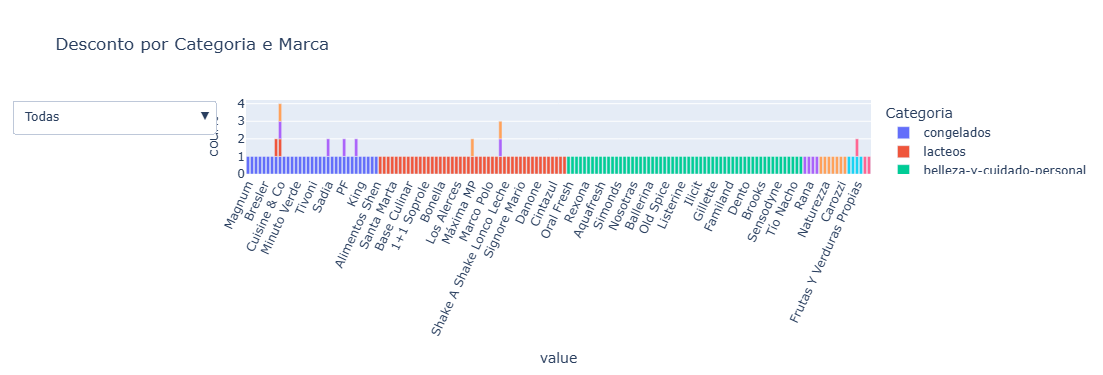

In [18]:
# Seu código aqui
# Agrupando os dados do DataFrame por Categoria e Marca e calculando a média do Desconto
preco_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index().sort_values(by = 'Desconto', ascending = False)

#Gráfico de barras horizontais
fig = px.bar(preco_categoria_marca, x = 'Desconto', y = (['Categoria','Marca']),
            title = 'Desconto por Categoria e Marca',
            labels = {'Categoria_Marca': 'Categoria e Marca', 'Desconto': 'Desconto (%)'},
            color = 'Categoria',
            width = 1150)

#Criar menu para filtrar categoria
categorias = preco_categoria_marca['Categoria'].unique()
fig.update_layout(
    updatemenus = [
        {
            'buttons': [
                {'label': 'Todas', 'method': 'restyle', 'args': [{'visible': [True] * len(preco_categoria_marca)}]},
                *[
                    {
                        'label': cat,
                        'method': 'restyle',
                        'args': [{'visible': preco_categoria_marca['Categoria'] == cat}]
                    }
                    for cat in categorias
                ]
            ],
            'direction': 'down',
            'showactive': True
        }
    ]
)

fig.update_layout(xaxis_tickangle = -65)
fig.show()


---------

## ANOTAÇÕES
* group by => agrupar os dados do df pela coluna 
* count() => contar o número de ocorrências da coluna
* .reset_index() =>  Resetar o índice do resultado anterior
* .sort_values => ordenar os resultados do DataFrame
* normalize=True => faz com que os resultados sejam normalizados, ou seja, as contagens são divididas pelo numero total de entradas para fornecer a proporção
* .mean() => calcula da media
* .sum() => calcula a soma
* .median() => calcula a mediana
* .mode() => calcula a moda
* .std() => calcula o desvio padrão
* .describe() => usado para gerar estatísticas descritivas de resumo de um DataFrame